# Mapping Hospitals & Medial Centers in LA City
### by Mariana Estrada
### 
### Data sources: Hospitals & Medical Centers - County of LA Enterprise GIS (eGIS) Hub 

In [1]:
# Importing Geo pandas so I can use the library of functions to clean and plot my spatial data
import pandas as pd
import geopandas as gpd

In [2]:
# Importing Matplotlib and Contextily so I can use different tiles for my basemap and functions so I can plot my data
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
# Importing my data set on hospitals and medical centers in LA County from the County of LA Enterprise GIS (eGIS) Hub
# Using pd since it is in tabular form
# Naming my data frame "data"
data=pd.read_csv("week_4_data/Hospitals_and_Medical_Centers.csv")

In [4]:
# Exploring data
# I want to know the type of data I have
type(data)

pandas.core.frame.DataFrame

In [5]:
# Exploring data
# I want to see the fields in my data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             165 non-null    float64
 1   Y             165 non-null    float64
 2   OBJECTID      165 non-null    int64  
 3   source        143 non-null    object 
 4   ext_id        13 non-null     object 
 5   cat1          165 non-null    object 
 6   cat2          165 non-null    object 
 7   cat3          110 non-null    object 
 8   org_name      82 non-null     object 
 9   Name          165 non-null    object 
 10  addrln1       163 non-null    object 
 11  addrln2       11 non-null     object 
 12  city          163 non-null    object 
 13  state         163 non-null    object 
 14  hours         158 non-null    object 
 15  phones        164 non-null    object 
 16  url           155 non-null    object 
 17  info1         10 non-null     object 
 18  info2         3 non-null      

In [6]:
# Exploring data
# I want to see some of my records
data.head()

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,zip,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y
0,-118.216024,34.204530,9,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Verdugo Hills Hospital,...,91208.0,http://egis3.lacounty.gov/lms/?p=560,publish,34.204530,-118.216023,2016/01/29 10:45:00+00,NaN,NaN,6.496353e+06,1.896883e+06
1,-118.248312,34.075693,11,211,NaN,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,NaN,Barlow Respiratory Hospital - Los Angeles (Mai...,...,90026.0,http://egis3.lacounty.gov/lms/?p=561,publish,34.075693,-118.248312,2016/01/21 15:56:47+00,NaN,NaN,6.486475e+06,1.850019e+06
2,-117.865075,34.127307,20,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Glendora Community Hospital,...,91740.0,http://egis3.lacounty.gov/lms/?p=568,publish,34.127307,-117.865075,2016/01/22 14:39:39+00,NaN,NaN,6.602504e+06,1.868737e+06
3,-118.357113,33.838634,25,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Providence Little Company of Mary Medical Center,Providence Little Company Of Mary Medical Cent...,...,90503.0,http://egis3.lacounty.gov/lms/?p=569,publish,33.838634,-118.357113,2016/01/27 11:34:40+00,NaN,NaN,6.453221e+06,1.763848e+06
4,-118.257443,34.128058,35,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Glendale Memorial Hospital And Health Center,...,91204.0,http://egis3.lacounty.gov/lms/?p=570,publish,34.128058,-118.257443,2016/01/22 16:10:02+00,NaN,NaN,6.483758e+06,1.869083e+06


In [7]:
# Exploring data
# I want to see more the last records in my data set
data.tail()

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,zip,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y
160,-118.396943,34.023195,71348,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,NaN,Southern California Hospital at Culver City,...,90232.0,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016/02/02 13:21:01+00,NaN,NaN,6.441390e+06,1.831059e+06
161,-118.396943,34.023195,71349,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Southern California Hospital at Culver City,...,90232.0,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016/02/02 13:21:01+00,NaN,NaN,6.441390e+06,1.831059e+06
162,-118.396943,34.023195,71350,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,Acute Care,NaN,Southern California Hospital at Culver City,...,90232.0,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016/02/02 13:21:01+00,NaN,NaN,6.441390e+06,1.831059e+06
163,-118.325144,34.096445,71351,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,NaN,Southern California Hospital at Hollywood,...,90028.0,http://egis3.lacounty.gov/lms/?p=80738,publish,34.096445,-118.325144,2016/02/03 11:38:45+00,NaN,NaN,6.463232e+06,1.857638e+06
164,-118.325144,34.096445,71352,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,Acute Care,NaN,Southern California Hospital at Hollywood,...,90028.0,http://egis3.lacounty.gov/lms/?p=80738,publish,34.096445,-118.325144,2016/02/03 11:38:45+00,NaN,NaN,6.463232e+06,1.857638e+06


In [8]:
# Exploring data
# I want to see a random sample of 10
data.sample(10)

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,zip,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y
162,-118.396943,34.023195,71350,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,Acute Care,NaN,Southern California Hospital at Culver City,...,90232.0,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016/02/02 13:21:01+00,NaN,NaN,6.441390e+06,1.831059e+06
36,-118.456549,34.220426,247,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Mission Community Hospital,...,91402.0,http://egis3.lacounty.gov/lms/?p=676,publish,34.220426,-118.456549,2016/01/25 16:32:24+00,NaN,NaN,6.423655e+06,1.902911e+06
3,-118.357113,33.838634,25,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Providence Little Company of Mary Medical Center,Providence Little Company Of Mary Medical Cent...,...,90503.0,http://egis3.lacounty.gov/lms/?p=569,publish,33.838634,-118.357113,2016/01/27 11:34:40+00,NaN,NaN,6.453221e+06,1.763848e+06
142,-118.242780,33.923530,68050,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,"Martin Luther King, Jr. Community Hospital",Martin Luther King Jr. Community Hospital,...,90059.0,http://egis3.lacounty.gov/lms/?p=76520,publish,33.923530,-118.242780,2016/01/15 14:55:10+00,NaN,NaN,6.488016e+06,1.794640e+06
104,-118.532994,34.220347,3778,HSIP Freedom Airports_Heliports,CA86,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,US Geological Survey (USGS) & LA County,Northridge Hospital Medical Center,...,91328.0,http://egis3.lacounty.gov/lms/?p=4585,publish,34.220347,-118.532994,2016/02/01 16:24:56+00,NaN,NaN,6.400545e+06,1.902996e+06
32,-118.396204,34.240153,182,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Pacifica Hospital Of The Valley,...,91352.0,http://egis3.lacounty.gov/lms/?p=637,publish,34.240153,-118.396204,2016/01/26 17:59:43+00,NaN,NaN,6.441925e+06,1.910013e+06
44,-118.452530,34.052668,1073,211,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,US Department of Veterans Affairs,Veterans Administration Greater Los Angeles He...,...,90073.0,http://egis3.lacounty.gov/lms/?p=1135,publish,34.052668,-118.452530,2016/01/29 11:29:36+00,NaN,NaN,6.424595e+06,1.841856e+06
102,-118.295095,34.098532,1457,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Kaiser Permanente,Kaiser Permanente - Los Angeles Medical Center,...,90027.0,http://egis3.lacounty.gov/lms/?p=1325,publish,34.098532,-118.295095,2016/01/25 09:43:57+00,NaN,NaN,6.472332e+06,1.858369e+06
97,-118.105800,34.101221,1441,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,San Gabriel Valley Medical Center,...,91776.0,http://egis3.lacounty.gov/lms/?p=1318,publish,34.101221,-118.105800,2016/01/27 15:59:32+00,NaN,NaN,6.529641e+06,1.859234e+06
141,-118.103592,34.102268,65621,211,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,NaN,Dreamweaver Medical Associates,...,91776.0,http://egis3.lacounty.gov/lms/?p=71837,publish,34.102268,-118.103592,2016/02/03 17:40:24+00,NaN,NaN,6.530310e+06,1.859614e+06


In [9]:
# Exploring data
# I want to know how may rows and columns there are
data.shape

(165, 31)

In [10]:
# Exploring data
# I want to know how many unique hospitals and medical centers there are in LA County
data['Name'].value_counts()

Cedars-Sinai Medical Center           9
California Hospital Medical Center    7
Antelope Valley Hospital              5
Centinela Hospital Medical Center     5
Beverly Hospital                      5
                                     ..
East Los Angeles Doctors Hospital     1
Coast Plaza Doctors Hospital          1
Catalina Island Medical Center        1
West Covina Medical Center            1
Glendale Adventist Medical Center     1
Name: Name, Length: 117, dtype: int64

In [11]:
# Preparing data
# Converting df to gdf
# My data set doesn't have a geometry so I will create a column where both x and y are included
gdf = gpd.GeoDataFrame(data,
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(data.X, data.Y))

In [12]:
# I want to see my new "Geomrety" field
print(gdf)

              X          Y  OBJECTID source ext_id                      cat1  \
0   -118.216024  34.204530         9    211    NaN  Health and Mental Health   
1   -118.248312  34.075693        11    211    NaN  Health and Mental Health   
2   -117.865075  34.127307        20    211    NaN  Health and Mental Health   
3   -118.357113  33.838634        25    211    NaN  Health and Mental Health   
4   -118.257443  34.128058        35    211    NaN  Health and Mental Health   
..          ...        ...       ...    ...    ...                       ...   
160 -118.396943  34.023195     71348    NaN    NaN  Health and Mental Health   
161 -118.396943  34.023195     71349    NaN    NaN  Health and Mental Health   
162 -118.396943  34.023195     71350    NaN    NaN  Health and Mental Health   
163 -118.325144  34.096445     71351    NaN    NaN  Health and Mental Health   
164 -118.325144  34.096445     71352    NaN    NaN  Health and Mental Health   

                              cat2     

In [13]:
# I want to review the cordinate system
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# Trimming the data
# I will review my data again
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   X             165 non-null    float64 
 1   Y             165 non-null    float64 
 2   OBJECTID      165 non-null    int64   
 3   source        143 non-null    object  
 4   ext_id        13 non-null     object  
 5   cat1          165 non-null    object  
 6   cat2          165 non-null    object  
 7   cat3          110 non-null    object  
 8   org_name      82 non-null     object  
 9   Name          165 non-null    object  
 10  addrln1       163 non-null    object  
 11  addrln2       11 non-null     object  
 12  city          163 non-null    object  
 13  state         163 non-null    object  
 14  hours         158 non-null    object  
 15  phones        164 non-null    object  
 16  url           155 non-null    object  
 17  info1         10 non-null     object  
 18  in

In [15]:
# I will now trim my data
gdf[['source', 'cat3', 'Name', 'addrln1', 'city', 'hours', 'description', 'zip', 'geometry', 'X', 'Y']]

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
0,211,911 Receiving,Verdugo Hills Hospital,1812 Verdugo Blvd.,Glendale,Administrative hours are Monday through Friday...,The facility provides health education and hos...,91208.0,POINT (-118.21602 34.20453),-118.216024,34.204530
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
2,211,911 Receiving,Glendora Community Hospital,150 W. Route 66,Glendora,24 hours a day,Services provided include comprehensive acute ...,91740.0,POINT (-117.86507 34.12731),-117.865075,34.127307
3,211,911 Receiving,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,Torrance,24 hours a day 7 days at week,Providence Little Company of Mary Medical Cent...,90503.0,POINT (-118.35711 33.83863),-118.357113,33.838634
4,211,911 Receiving,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,Glendale,"Monday through Friday, 9:00am to 5:00pm. Emer...","Established in 1926, Glendale Memorial Hospita...",91204.0,POINT (-118.25744 34.12806),-118.257443,34.128058
...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
161,NaN,911 Receiving,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
162,NaN,Acute Care,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
163,NaN,NaN,Southern California Hospital at Hollywood,6245 De Longpre Avenue,Hollywood,"5:30am to 7:30pm, Monday through Friday",Welcome to Southern California Hospital at Hol...,90028.0,POINT (-118.32514 34.09645),-118.325144,34.096445


In [16]:
# I will now declare the trim verion as a new variable
gdf_trimmed=gdf[['source', 'cat3', 'Name', 'addrln1', 'city', 'hours', 'description', 'zip', 'geometry', 'X', 'Y']]

In [17]:
gdf_trimmed.head()

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
0,211,911 Receiving,Verdugo Hills Hospital,1812 Verdugo Blvd.,Glendale,Administrative hours are Monday through Friday...,The facility provides health education and hos...,91208.0,POINT (-118.21602 34.20453),-118.216024,34.204530
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
2,211,911 Receiving,Glendora Community Hospital,150 W. Route 66,Glendora,24 hours a day,Services provided include comprehensive acute ...,91740.0,POINT (-117.86507 34.12731),-117.865075,34.127307
3,211,911 Receiving,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,Torrance,24 hours a day 7 days at week,Providence Little Company of Mary Medical Cent...,90503.0,POINT (-118.35711 33.83863),-118.357113,33.838634
4,211,911 Receiving,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,Glendale,"Monday through Friday, 9:00am to 5:00pm. Emer...","Established in 1926, Glendale Memorial Hospita...",91204.0,POINT (-118.25744 34.12806),-118.257443,34.128058


In [18]:
# I want a random sample of my data set
gdf_trimmed.sample(10)

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
12,211,Stroke,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
160,NaN,NaN,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
75,211,NaN,Kindred Hospital - San Gabriel Valley,845 N. Lark Ellen Ave.,West Covina,NaN,Kindred Hospitals are a part of Kindred Health...,91791.0,POINT (-117.91725 34.08707),-117.917246,34.087068
113,HSIP Freedom Gnis_structures,NaN,Miller Children's Hospital,2801 Atlantic Avenue,Long Beach,NaN,Miller Children’s &amp; Women's Hospital Long ...,90806.0,POINT (-118.18674 33.80811),-118.186744,33.808107
73,211,911 Receiving,Torrance Memorial Medical Center,3330 Lomita Blvd.,Torrance,"24 hours a day, 7 days at week",Your healthcare needs - and the healthcare nee...,90505.0,POINT (-118.34349 33.81192),-118.343495,33.811916
38,211,911 Receiving,Pomona Valley Hospital Medical Center,1798 N. Garey Ave.,Pomona,24 hours a day 7 days at week\r\n\r\nVisiting ...,"PVHMC is a not-for-profit, regional Medical Ce...",91767.0,POINT (-117.75150 34.07701),-117.751498,34.077008
26,211,Disaster Resource Center,Children's Hospital Los Angeles,4650 Sunset Blvd,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Children's Hospital Los Angeles (CHLA) is a 50...,90027.0,POINT (-118.29101 34.09802),-118.291013,34.098019
124,211,NaN,Tarzana Family Medical Clinic - Lancaster,907 W Lancaster Blvd,Lancaster,"Monday through Friday, 8:00am to 4:00pm.",The center provides domestic violence services...,93534.0,POINT (-118.14722 34.69768),-118.147218,34.697676
163,NaN,NaN,Southern California Hospital at Hollywood,6245 De Longpre Avenue,Hollywood,"5:30am to 7:30pm, Monday through Friday",Welcome to Southern California Hospital at Hol...,90028.0,POINT (-118.32514 34.09645),-118.325144,34.096445
132,211,NaN,Mission Community Hospital - San Fernando Camp...,700 Chatsworth Dr,San Fernando,"Monday through Thursday, 8:30am to 5:30pm.","Owned and operated by Deanco Healthcare, LLC, ...",91340.0,POINT (-118.44450 34.27666),-118.444495,34.276655


In [19]:
# Querying the data
# I want to see how many unique values there are "city"
gdf_trimmed['city'].value_counts()

Los Angeles         52
Long Beach           9
Lancaster            6
Montebello           5
Inglewood            5
Baldwin Park         4
Pasadena             4
West Covina          4
Glendale             3
Culver City          3
San Dimas            3
Whittier             3
Northridge           3
Pomona               3
Downey               2
San Gabriel          2
Monterey Park        2
Alhambra             2
Encino               2
Palmdale             2
Norwalk              2
Hollywood            2
Santa Monica         2
Glendora             2
Torrance             2
Panorama City        2
Van Nuys             2
Covina               2
Chino Hills          1
San Pedro            1
South El Monte       1
City of Commerce     1
Lincoln Heights      1
Sun Valley           1
North Hills          1
San Fernando         1
Monrovia             1
La Mirada            1
Harbor City          1
Avalon               1
Gardena              1
Tarzana              1
Paramount            1
Duarte     

In [20]:
# Querying the data
# I want to see the records that have hospitals in Los Angeles
gdf_trimmed.loc[gdf_trimmed['city']=='Los Angeles']

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
5,211,Trauma Center,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
6,211,911 Receiving,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
7,211,EDAP-PMC,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
8,211,Acute Care,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
9,211,Base Hospital,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
10,211,Disaster Resource Center,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
11,211,STEMI,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
12,211,Stroke,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
13,211,Perinatal,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219


In [21]:
# Querying the data
# I want to see the records that have hospitals in Inglewood
gdf_trimmed.loc[gdf_trimmed['city']=='Inglewood']

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
87,211,911 Receiving,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783
88,211,EDAP-PMC,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783
89,211,Respiratory Hospital,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783
90,211,Perinatal,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783
91,211,Rehabilitation,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783


<AxesSubplot: >

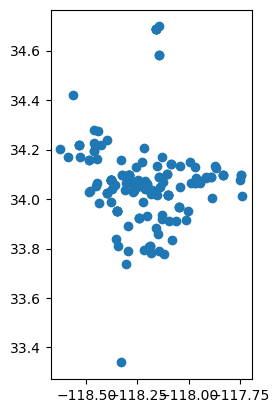

In [22]:
# Plotting to see my data set - even tho I have a geometry - I just want to see
gdf_trimmed.plot()

In [23]:
# Cleaning data
# Checking for null columns
gdf_trimmed.columns[gdf_trimmed.isna().all()].tolist()

[]

In [24]:
# I will look at the data again to see how I want to keep cleaning it
gdf_trimmed.head(1000)

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
0,211,911 Receiving,Verdugo Hills Hospital,1812 Verdugo Blvd.,Glendale,Administrative hours are Monday through Friday...,The facility provides health education and hos...,91208.0,POINT (-118.21602 34.20453),-118.216024,34.204530
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
2,211,911 Receiving,Glendora Community Hospital,150 W. Route 66,Glendora,24 hours a day,Services provided include comprehensive acute ...,91740.0,POINT (-117.86507 34.12731),-117.865075,34.127307
3,211,911 Receiving,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,Torrance,24 hours a day 7 days at week,Providence Little Company of Mary Medical Cent...,90503.0,POINT (-118.35711 33.83863),-118.357113,33.838634
4,211,911 Receiving,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,Glendale,"Monday through Friday, 9:00am to 5:00pm. Emer...","Established in 1926, Glendale Memorial Hospita...",91204.0,POINT (-118.25744 34.12806),-118.257443,34.128058
...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
161,NaN,911 Receiving,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
162,NaN,Acute Care,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
163,NaN,NaN,Southern California Hospital at Hollywood,6245 De Longpre Avenue,Hollywood,"5:30am to 7:30pm, Monday through Friday",Welcome to Southern California Hospital at Hol...,90028.0,POINT (-118.32514 34.09645),-118.325144,34.096445


In [25]:
# I will now rename my columns
gdf_trimmed.columns=['Source',
                     'Type',
                     'Hospital_Name',
                     'Address',
                     'City',
                     'Hours',
                     'Description',
                     'Zip_Code',
                     'Geometry',
                     'Long',
                     'Lat']

In [26]:
# I will review my new columns
gdf_trimmed.sample(5)

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
95,211,911 Receiving,Olympia Medical Center,5900 W. Olympic Blvd.,Los Angeles,"Monday through Friday, 9:00am to 5:00pm.",Olympia Medical Center is an Alecto Healthcare...,90036.0,POINT (-118.36025 34.05714),-118.360252,34.057145
151,NaN,NaN,Miracle Mile Medical Center,"6000 San Vicente Blvd,",Los Angeles,Mon 6:30 PM to 8:00 PM,Welcome to Miracle Mile Medical Center (MMMC)....,90036.0,POINT (-118.36245 34.05745),-118.362450,34.057449
147,NaN,NaN,Kindred Hospital - La Mirada,14900 E. Imperial Highway,La Mirada,"24 hours at day, 7 days at week.",Kindred Hospitals are a part of Kindred Health...,90638.0,POINT (-118.01335 33.91655),-118.013352,33.916547
62,211,EDAP-PMC,Beverly Hospital,309 W. Beverly Blvd.,Montebello,24 hours a day,For more than 65 years Beverly Hospital has be...,90640.0,POINT (-118.10064 34.01502),-118.100636,34.015015
51,211,SART (Sexual Assault Response Team Center),Antelope Valley Hospital,1600 West Avenue J,Lancaster,"Office hours are Monday through Friday, 8:00am...","The facility provides health education, hospit...",93534.0,POINT (-118.15816 34.68808),-118.158160,34.688078


### I will not plot this data set since it has a geometry
### I will also not sort this data set since there isn't a value/number attached to a record

In [27]:
# I am only interested in mapping hospitals in LA City so I will make a new query where City = Los Angeles
gdf_trimmed[gdf_trimmed['City']=='Los Angeles']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
5,211,Trauma Center,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
6,211,911 Receiving,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
7,211,EDAP-PMC,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
8,211,Acute Care,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
9,211,Base Hospital,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
10,211,Disaster Resource Center,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
11,211,STEMI,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
12,211,Stroke,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
13,211,Perinatal,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219


In [28]:
# My new data set only includes values in LA City
# I will now create a variable that holds this query
LA_City_Hospitals=gdf_trimmed[gdf_trimmed['City']=='Los Angeles']

In [29]:
# I will now review my new data variable
LA_City_Hospitals.sample(5)

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
155,NaN,911 Receiving,Saint Vincent Medical Center,2131 West Third Street,Los Angeles,GENERAL ACUTE CARE\r\n8:30 a.m. – 8:30 p.m.,St. Vincent Medical Center is committed to imp...,90057.0,POINT (-118.27365 34.06382),-118.273655,34.063818
156,NaN,Acute Care,Saint Vincent Medical Center,2131 West Third Street,Los Angeles,GENERAL ACUTE CARE\r\n8:30 a.m. – 8:30 p.m.,St. Vincent Medical Center is committed to imp...,90057.0,POINT (-118.27365 34.06382),-118.273655,34.063818
144,NaN,Perinatal,Martin Luther King Jr. Community Hospital,"1680 E. 120th Street,",Los Angeles,24/7,The hospital has 131 beds providing general ac...,90059.0,POINT (-118.24278 33.92353),-118.242780,33.923530
80,211,NaN,Shriners Hospitals For Children,3160 Geneva St.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm\r\n\r\...",Located on the outskirts of downtown Los Angel...,90020.0,POINT (-118.28643 34.06718),-118.286430,34.067184
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693


### I will now begin mapping!

In [30]:
# Importing folium since I forgot to do this earlier :p
import folium

In [31]:
# Starting a default map
m=folium.Map(),
m

(<folium.folium.Map at 0x7f966f2a3190>,)

In [33]:
# Calculating the long and lat which is located in my original data set "data"
latitude=LA_City_Hospitals.Lat.mean()
longitude=LA_City_Hospitals.Long.mean()

In [34]:
# I want to see my longitude
longitude

-118.29600557508054

In [35]:
# I wany to see my latitude
latitude

34.05122792407739

In [46]:
# I will now bring the folium in with arguments
m=folium.Map(location=[latitude, longitude],
             tiles='CartoDB positron',
             attribution='CartoDB')
m

In [77]:
# I will now add markers to represent the hospitals in LA City
# There are are 52 records so I will use loops
for index, row in LA_City_Hospitals.iterrows():
    folium.Marker([row.Lat, row.Long],
                  icon=folium.Icon(color="green"),
                  popup = row.Hospital_Name,
                 ).add_to(m)
m

In [78]:
# I will now add a title using code I found online
# Folium doesn't have a function for adding a title so it requires HTML 
for index, row in LA_City_Hospitals.iterrows():
    m = folium.Map(location=[latitude, longitude],
             tiles='CartoDB positron',
             attribution='CartoDB')
    title_html = '''<h3 align="center" style="font-size:20px"><b>Hospitals in LA City</b></h3>'''
    m.get_root().html.add_child(folium.Element(title_html))

m

In [79]:
# I will now make hospital specific markers
for index, row in LA_City_Hospitals.iterrows():
    folium.Marker([row.Lat, row.Long],
                  icon=folium.Icon(color='blue', icon='fa-thin fa-hospital', prefix='fa'),
                  popup = row.Hospital_Name
                 ).add_to(m)
m